# Data Project

> **Note:** 
> 1. This is a starting point for how to structure your data project 
> 1. The `dataproject.py` file includes functions which can be in this notebook

Import and set magics:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dstapi import DstApi

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
#import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1

We load the data from ....

In [12]:
#data = dataproject.load_data()





# 1.2
PRIS113_api = DstApi('PRIS113') 
# hint,
params = PRIS113_api._define_base_params(language='en')
display(params)
PRIS113 = PRIS113_api.get_data(params=params)

PRIS113 = PRIS113.sort_values(by = 'TID').reset_index(drop=True)
PRIS113.INDHOLD = PRIS113.INDHOLD.astype('float')

columns_dict = {}
columns_dict['TID'] = 'YM'
columns_dict['INDHOLD'] = 'INDEX'
PRIS113 = PRIS113.rename(columns=columns_dict)



PRIS113.head()






#levels = DstApi('PRIS111').variable_levels('VAREGR',language='en' )
#for row in levels.itertuples(): print(row.id,row.text)

{'table': 'pris113',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TYPE', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

,TYPE,YM,INDEX
0,Consumer price index,1980M01,33.0
1,Consumer price index,1980M02,33.3
2,Consumer price index,1980M03,33.8
3,Consumer price index,1980M04,34.0
4,Consumer price index,1980M05,34.5


In [13]:
PRIS113['PI'] = PRIS113['INDEX']/PRIS113['INDEX'].shift(1)-1
PRIS113.head()

,TYPE,YM,INDEX,PI
0,Consumer price index,1980M01,33.0,NaN
1,Consumer price index,1980M02,33.3,0.009091
2,Consumer price index,1980M03,33.8,0.015015
3,Consumer price index,1980M04,34.0,0.005917
4,Consumer price index,1980M05,34.5,0.014706


In [23]:
# 1.2 cont.


alpha = [0,1,2,3]
k = np.arange(0,12)
T = 12


for alphai in alpha:
    for ki in k:
        PRIS113[f'PI12^{alphai}_{ki}'] = (np.prod(1+PRIS113['PI'].shift(ki))**(kappa(ki,alphai)-1))



def kappa(kk, alpha):
    denom = np.sum((T - k) ** alpha)
    return ((T - kk) ** alpha / denom) * T

for alphai in alpha:
    for ki in k:
        # create a per-(alpha,k) column: (1 + PI_{t-ki}) ** kappa
        PRIS113[f'PI12^{alphai}_{ki}'] = (1 + PRIS113['PI'].shift(ki)) ** kappa(ki, alphai)

    # aggregate for this alpha by multiplying the 12 weighted terms and subtract 1
    cols = [f'PI12^{alphai}_{ki}' for ki in k]
    PRIS113[f'PI12^{alphai}'] = PRIS113[cols].prod(axis=1) - 1

PRIS113.head(15)

,TYPE,YM,INDEX,PI,PI12^0_0,PI12^0_1,PI12^0_2,PI12^0_3,PI12^0_4,PI12^0_5,...,PI12^3_6,PI12^3_7,PI12^3_8,PI12^3_9,PI12^3_10,PI12^3_11,PI12^0,PI12^1,PI12^2,PI12^3
0,Consumer price index,1980M01,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,Consumer price index,1980M02,33.3,0.009091,1.009091,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.009091,0.016848,0.024350,0.031325
2,Consumer price index,1980M03,33.8,0.015015,1.015015,1.009091,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.024242,0.043759,0.061662,0.077403
3,Consumer price index,1980M04,34.0,0.005917,1.005917,1.015015,1.009091,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.030303,0.051309,0.067889,0.080132
4,Consumer price index,1980M05,34.5,0.014706,1.014706,1.005917,1.015015,1.009091,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.045455,0.075080,0.097502,0.113661
5,Consumer price index,1980M06,34.6,0.002899,1.002899,1.014706,1.005917,1.015015,1.009091,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.048485,0.073473,0.087821,0.094607
6,Consumer price index,1980M07,35.2,0.017341,1.017341,1.002899,1.014706,1.005917,1.015015,1.009091,...,NaN,NaN,NaN,NaN,NaN,NaN,0.066667,0.100049,0.120461,0.132747
7,Consumer price index,1980M08,35.3,0.002841,1.002841,1.017341,1.002899,1.014706,1.005917,1.015015,...,1.003863,NaN,NaN,NaN,NaN,NaN,0.069697,0.094900,0.104716,0.106718
8,Consumer price index,1980M09,35.5,0.005666,1.005666,1.002841,1.017341,1.002899,1.014706,1.005917,...,1.006370,1.002234,NaN,NaN,NaN,NaN,0.075758,0.094971,0.098662,0.096463
9,Consumer price index,1980M10,35.8,0.008451,1.008451,1.005666,1.002841,1.017341,1.002899,1.014706,...,1.002517,1.003681,1.001143,NaN,NaN,NaN,0.084848,0.099691,0.100800,0.098515


In [22]:
print(PRIS113.columns)

Index(['TYPE', 'YM', 'INDEX', 'PI', 'PI12^0_0', 'PI12^0_1', 'PI12^0_2',
       'PI12^0_3', 'PI12^0_4', 'PI12^0_5', 'PI12^0_6', 'PI12^0_7', 'PI12^0_8',
       'PI12^0_9', 'PI12^0_10', 'PI12^0_11', 'PI12^1_0', 'PI12^1_1',
       'PI12^1_2', 'PI12^1_3', 'PI12^1_4', 'PI12^1_5', 'PI12^1_6', 'PI12^1_7',
       'PI12^1_8', 'PI12^1_9', 'PI12^1_10', 'PI12^1_11', 'PI12^2_0',
       'PI12^2_1', 'PI12^2_2', 'PI12^2_3', 'PI12^2_4', 'PI12^2_5', 'PI12^2_6',
       'PI12^2_7', 'PI12^2_8', 'PI12^2_9', 'PI12^2_10', 'PI12^2_11',
       'PI12^3_0', 'PI12^3_1', 'PI12^3_2', 'PI12^3_3', 'PI12^3_4', 'PI12^3_5',
       'PI12^3_6', 'PI12^3_7', 'PI12^3_8', 'PI12^3_9', 'PI12^3_10',
       'PI12^3_11', 'PI12^0', 'PI12^1', 'PI12^2', 'PI12^3'],
      dtype='object')


/var/folders/s7/hlb9x_wj05l8j_80bklpxs740000gn/T/ipykernel_5409/2669034808.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x = pd.to_datetime(x)


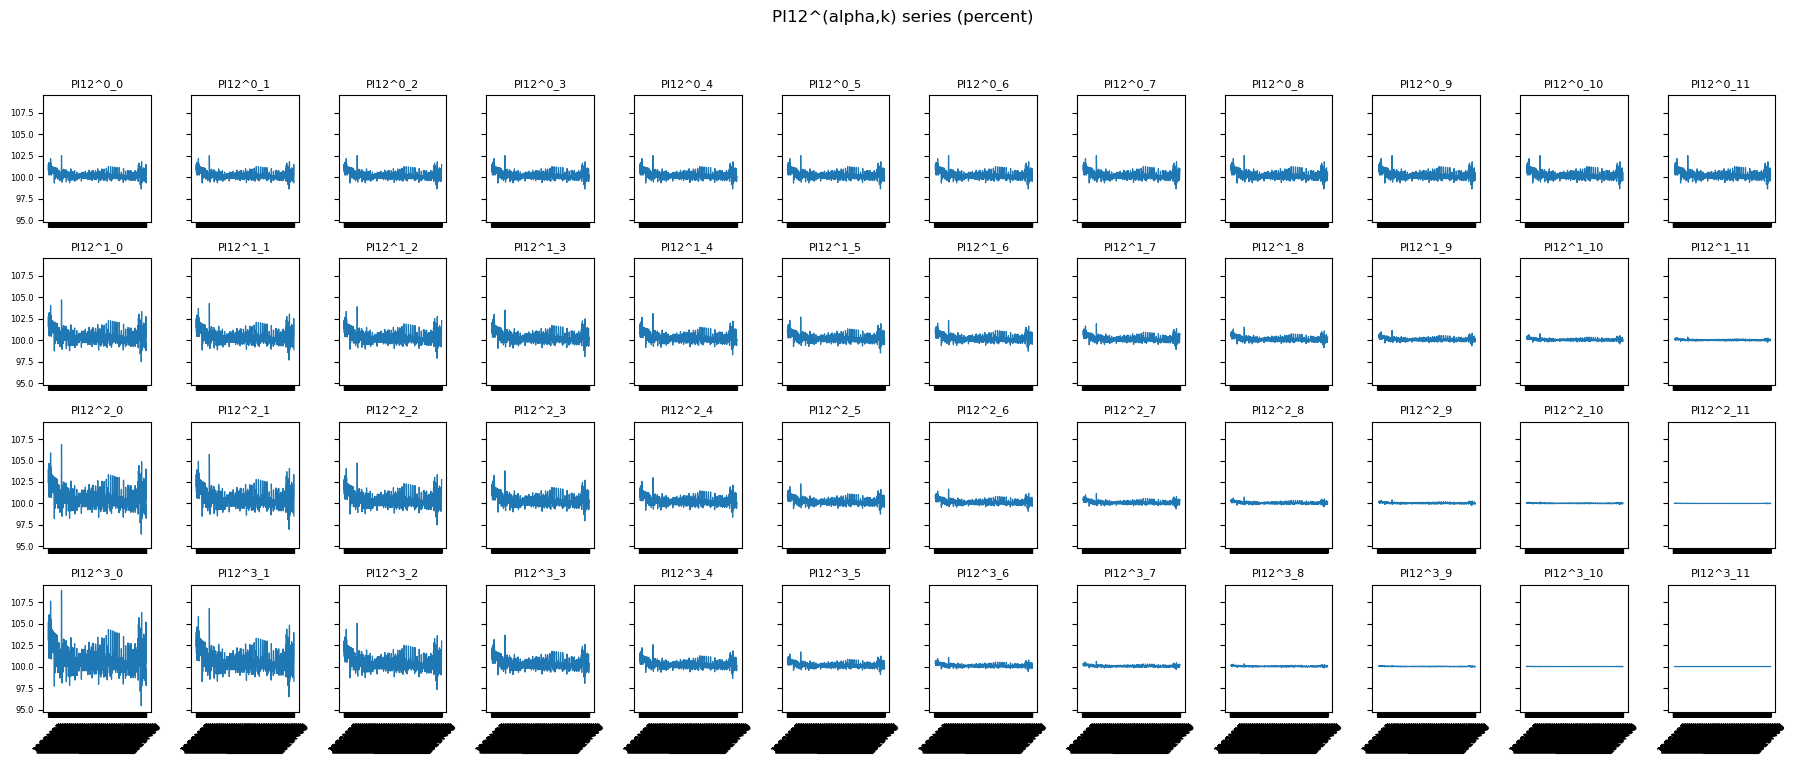

In [24]:
# select the 48 per-(alpha,k) columns (they contain an underscore)
import re
def _sort_key(c):
    m = re.match(r'PI12\^(\d+)_(\d+)', c)
    if m:
        return (int(m.group(1)), int(m.group(2)))
    return (999, c)

cols_48 = sorted([c for c in PRIS113.columns if c.startswith('PI12^') and '_' in c], key=_sort_key)
# make a copy of the 48 series
df48 = PRIS113[cols_48].copy()
# percent scaling for plotting
df48_pct = df48 * 100

# x-axis values (try to use datetimes if possible)
x = PRIS113.get('YM') if 'YM' in PRIS113.columns else PRIS113.index
try:
    x = pd.to_datetime(x)
except Exception:
    pass

# small multiples: 4 rows x 12 cols
n_rows = 4
n_cols = 12
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each series so the line begins at its first non-NaN value
for ax, col in zip(axes, cols_48):
    y = df48_pct[col]
    if y.notna().any():
        first_idx = y.first_valid_index()
        # align x and y by position/index: slice from first valid onwards
        if isinstance(x, pd.Series) or isinstance(x, pd.Index):
            ax.plot(x.loc[first_idx:], y.loc[first_idx:], lw=0.9)
        else:
            # x is array-like without labels; slice by integer position
            pos = y.index.get_loc(first_idx)
            ax.plot(x[pos:], y.iloc[pos:], lw=0.9)
    ax.set_title(col, fontsize=8)
    ax.tick_params(axis='x', labelrotation=45, labelsize=6)
    ax.tick_params(axis='y', labelsize=6)

# turn off extra axes if any
for ax in axes[len(cols_48):]:
    ax.set_visible(False)

fig.suptitle('PI12^(alpha,k) series (percent)', fontsize=12)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

1.2.2

In [ ]:






kappa_cache = {a: kappa_vector(a) for a in alpha_list}

def pi12_alpha_window(window, alpha):
    # window is array([pi_{t-11}, ..., pi_t])  (oldest->newest)
    pi_vals = window[::-1]                 # now pi_vals[0] == pi_t, pi_vals[1]==pi_{t-1}, ...
    weights = kappa_cache[alpha]           # length 12
    return np.prod((1.0 + pi_vals) ** weights) - 1.0

for a in alpha_list:
    col = f'PI12^{a}'
    PRIS113[col] = PRIS113['PI'].rolling(window=12, min_periods=12).apply(
        lambda w: pi12_alpha_window(w, a), raw=True
    )

## Question 2

We process the data by ...

In [3]:
data = dataproject.process_data(data)

In [ ]:
flotte jeppe er en meget høflig mand

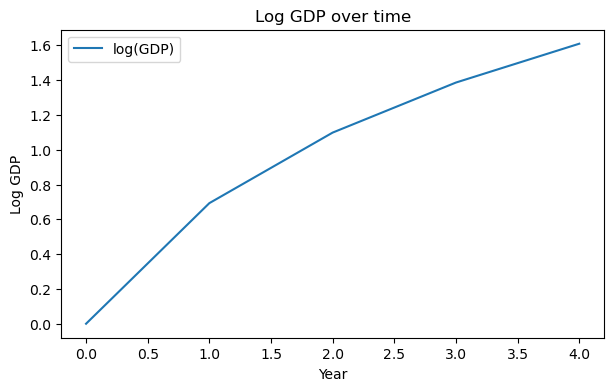

In [4]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)

ax.plot(data['log_GDP'],label='log(GDP)')

ax.set_title('Log GDP over time')
ax.set_xlabel('Year')
ax.set_ylabel('Log GDP')

ax.legend();

We find that that ...